# Global Threshold

Importing Dependencies

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

Adding Paths of Dataset

In [2]:
input_folder = "cars_dataset"
output_folder = "global_threshold"
os.makedirs(output_folder, exist_ok=True)

Setting the Threshold Values

In [3]:
threshold_value = 127


Applying Global Threshold

In [4]:
count = 0
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        img_path = os.path.join(input_folder, filename)

        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Apply global threshold
        _, thresh_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

        # Save the result
        cv2.imwrite(os.path.join(output_folder, filename), thresh_img)

        count += 1

print(f"\n✅ Global Threshold changing complete for {count} images!")
print(f"📂 Changed results saved in: {output_folder}")


✅ Global Threshold changing complete for 25 images!
📂 Changed results saved in: global_threshold


Output Preview

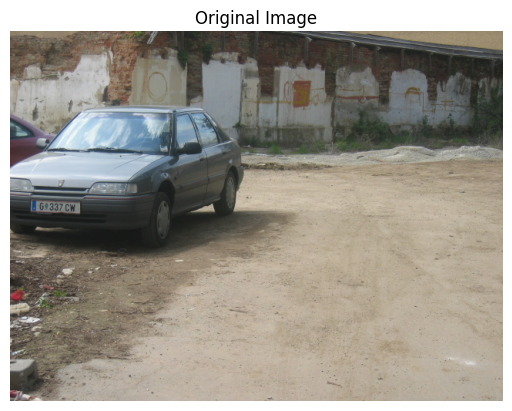

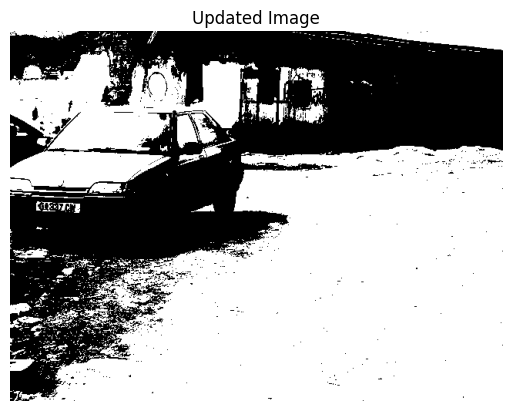

In [5]:
sample_output = os.listdir(input_folder)[0]
img_preview = cv2.imread(os.path.join(input_folder, sample_output))
plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

sample_output = os.listdir(output_folder)[0]
img_preview = cv2.imread(os.path.join(output_folder, sample_output))
plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
plt.title("Updated Image")
plt.axis('off')
plt.show()

# Object Labelling and Counting

Importing Dependencies

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Adding Paths of Dataset

In [7]:
input_folder = "cars_dataset"
output_folder = "labeled_dataset"
os.makedirs(output_folder, exist_ok=True)

Processing Each Image

In [8]:
threshold_value = 127  # can be changed if needed

count = 0
for root, _, files_list in os.walk(input_folder):
    for file in files_list:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Apply global threshold
            _, binary = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

            # Connected component labeling
            num_labels, labels_im = cv2.connectedComponents(binary)

            # Colorize the labels
            label_hue = np.uint8(179 * labels_im / np.max(labels_im))
            blank_ch = 255 * np.ones_like(label_hue)
            labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
            labeled_img = cv2.cvtColor(cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2RGB)
            labeled_img[label_hue == 0] = 0

            # Save output image
            output_path = os.path.join(output_folder, file)
            cv2.imwrite(output_path, cv2.cvtColor(labeled_img, cv2.COLOR_RGB2BGR))

            count += 1
            print(f"Processed: {file} | Objects detected: {num_labels - 1}")

print(f"\n✅ Object labeling complete for {count} images!")
print(f"📂 Labeled results saved in: {output_folder}")

Processed: carsgraz_015.bmp | Objects detected: 831
Processed: carsgraz_021.bmp | Objects detected: 1063
Processed: carsgraz_023.bmp | Objects detected: 276
Processed: carsgraz_016.bmp | Objects detected: 602
Processed: carsgraz_007.bmp | Objects detected: 243
Processed: carsgraz_003.bmp | Objects detected: 1314
Processed: carsgraz_012.bmp | Objects detected: 214
Processed: carsgraz_011.bmp | Objects detected: 1098
Processed: carsgraz_019.bmp | Objects detected: 237
Processed: carsgraz_018.bmp | Objects detected: 642
Processed: carsgraz_013.bmp | Objects detected: 227
Processed: carsgraz_005.bmp | Objects detected: 2192
Processed: carsgraz_010.bmp | Objects detected: 755
Processed: carsgraz_022.bmp | Objects detected: 363
Processed: carsgraz_017.bmp | Objects detected: 750
Processed: carsgraz_004.bmp | Objects detected: 1884
Processed: carsgraz_020.bmp | Objects detected: 1192
Processed: carsgraz_008.bmp | Objects detected: 592
Processed: carsgraz_024.bmp | Objects detected: 85
Process

Sample Output Preview

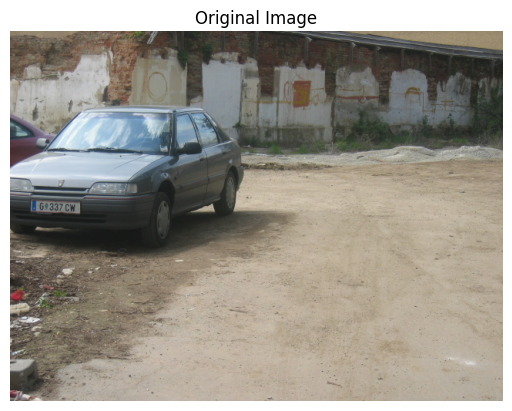

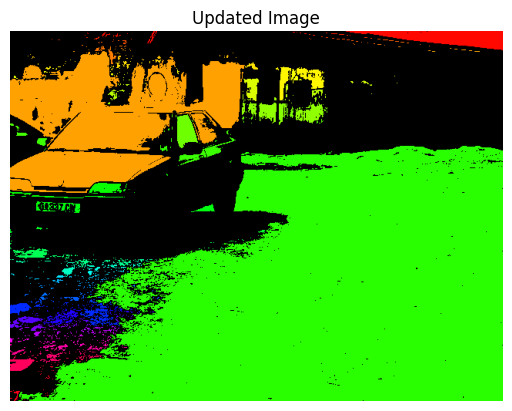

In [9]:
sample_output = os.listdir(input_folder)[0]
img_preview = cv2.imread(os.path.join(input_folder, sample_output))
plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

sample_output = os.listdir(output_folder)[0]
img_preview = cv2.imread(os.path.join(output_folder, sample_output))
plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
plt.title("Updated Image")
plt.axis('off')
plt.show()

# Hough Line Detection

Importing Dependencies

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Adding Paths of Dataset

In [11]:
input_folder = "cars_dataset"
output_folder = "Hough_lines_dataset"
os.makedirs(output_folder, exist_ok=True)

Processing Each Image

In [12]:
count = 0
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        img_path = os.path.join(input_folder, filename)

        # Read image
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Edge detection (Canny)
        edges = cv2.Canny(gray, 50, 150, apertureSize=3)

        # Apply Hough Transform
        lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

        # Draw lines on the image
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

        # Save output image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, img)

        count += 1

print(f"\n✅ Hough Line Detection complete for {count} images!")
print(f"📂 Output images saved in folder: '{output_folder}'")


✅ Hough Line Detection complete for 25 images!
📂 Output images saved in folder: 'Hough_lines_dataset'


Sample Output Preview

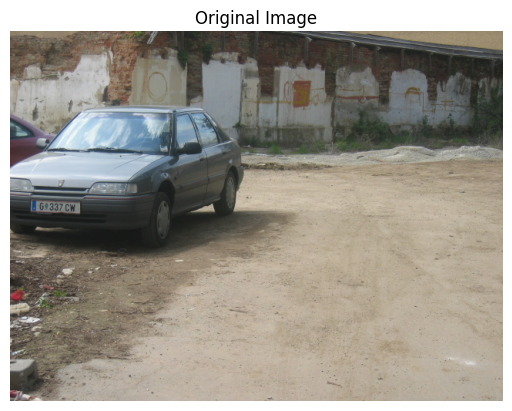

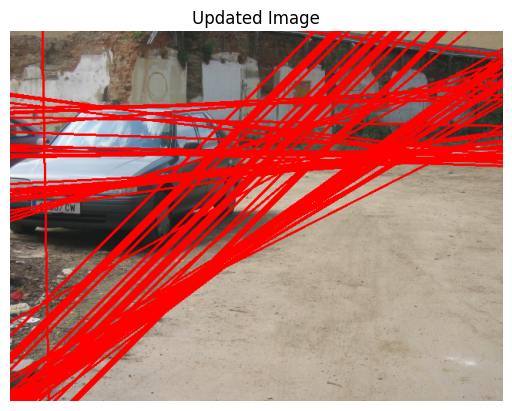

In [13]:
sample_output = os.listdir(input_folder)[0]
img_preview = cv2.imread(os.path.join(input_folder, sample_output))
plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

sample_output = os.listdir(output_folder)[0]
img_preview = cv2.imread(os.path.join(output_folder, sample_output))
plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
plt.title("Updated Image")
plt.axis('off')
plt.show()

# Optical Flow Detection

Importing Dependencies

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Adding Paths of Dataset

In [15]:
input_folder = "cars_dataset"
output_folder = "optical_flow_dataset"
os.makedirs(output_folder, exist_ok=True)

Processing Each Image

In [16]:
# Read and sort image sequence
image_files = sorted([f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])

count = 0

# Read the first image and convert to grayscale
prev_img = cv2.imread(os.path.join(input_folder, image_files[0]))
prev_gray = cv2.cvtColor(prev_img, cv2.COLOR_BGR2GRAY)

# Loop through all consecutive image pairs
for i in range(1, len(image_files)):
    img_path = os.path.join(input_folder, image_files[i])
    next_img = cv2.imread(img_path)
    next_gray = cv2.cvtColor(next_img, cv2.COLOR_BGR2GRAY)

    # Calculate dense optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None,
                                        pyr_scale=0.5, levels=3, winsize=15,
                                        iterations=3, poly_n=5, poly_sigma=1.2, flags=0)

    # Convert flow vectors to magnitude and angle
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Create HSV image to visualize flow
    hsv = np.zeros_like(prev_img)
    hsv[..., 1] = 255
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to RGB for display
    rgb_flow = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Save result
    output_path = os.path.join(output_folder, f"opticalflow_{i:03d}.jpg")
    cv2.imwrite(output_path, rgb_flow)

    prev_gray = next_gray
    count += 1

print(f"\n✅ Optical Flow Detection complete for {count} image pairs!")
print(f"📂 Output images saved in folder: '{output_folder}'")


✅ Optical Flow Detection complete for 24 image pairs!
📂 Output images saved in folder: 'optical_flow_dataset'


Sample Output Preview

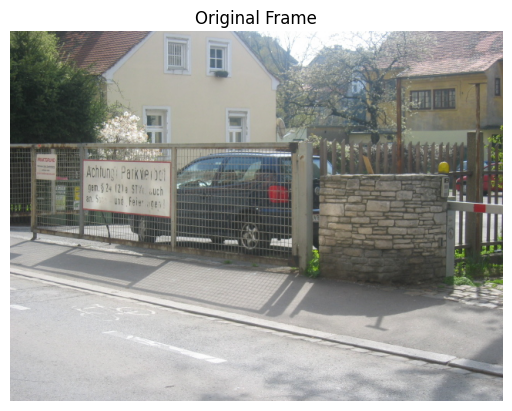

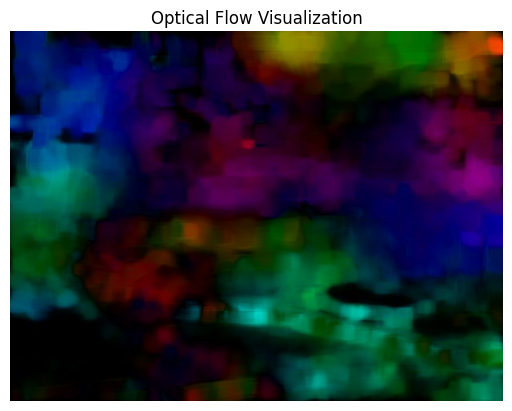

In [17]:
sample_original = os.path.join(input_folder, image_files[1])
img_original = cv2.imread(sample_original)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title("Original Frame")
plt.axis('off')
plt.show()

# Display Optical Flow Output
sample_flow = os.path.join(output_folder, os.listdir(output_folder)[0])
img_flow = cv2.imread(sample_flow)
plt.imshow(cv2.cvtColor(img_flow, cv2.COLOR_BGR2RGB))
plt.title("Optical Flow Visualization")
plt.axis('off')
plt.show()

# Face Detection Usin Harr Cascade Classifier

Importing Dependencies

In [18]:
import cv2
import matplotlib.pyplot as plt
import os

Adding Paths of Dataset

In [38]:
input_folder = "face_dataset"
output_folder = "face_detection_dataset"
os.makedirs(output_folder, exist_ok=True)

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Processing Each Image

In [39]:
count = 0
skipped = 0

# Check input folder existence and contents
if not os.path.exists(input_folder):
    raise FileNotFoundError(f"Input folder not found: {input_folder}")

input_files = [
    f
    for f in sorted(os.listdir(input_folder))
    if f.lower().endswith((".png", ".jpg", ".jpeg", ".bmp"))
]

if len(input_files) == 0:
    raise FileNotFoundError(f"No image files found in input folder: {input_folder}")

for filename in input_files:
    img_path = os.path.join(input_folder, filename)

    # Try to read image
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Skipping unreadable image: {img_path}")
        skipped += 1
        continue

    # Convert image to grayscale (safely)
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except Exception as e:
        print(f"⚠️ Error converting to grayscale for {img_path}: {e}")
        skipped += 1
        continue

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)
    )

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the output image (even if no faces found, save the original copy)
    output_path = os.path.join(output_folder, filename)
    saved = cv2.imwrite(output_path, img)
    if not saved:
        print(f"⚠️ Failed to save output image: {output_path}")
        skipped += 1
        continue

    count += 1

print(f"\n✅ Face Detection complete for {count} images!")
print(f"⚠️ Skipped/unprocessed images: {skipped}")
print(f"📂 Output images saved in folder: '{output_folder}'")


✅ Face Detection complete for 1 images!
⚠️ Skipped/unprocessed images: 0
📂 Output images saved in folder: 'face_detection_dataset'


Sample Output Preview

Displaying original input image: face_dataset/faceimage_001.bmp


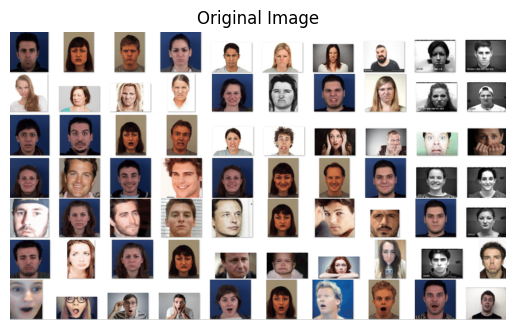

Displaying processed output image: face_detection_dataset/faceimage_001.bmp


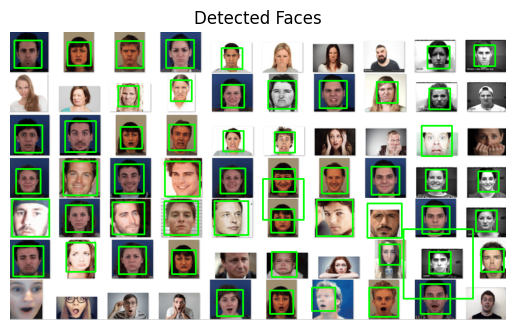

In [40]:
def safe_show_image(path, title="Image"):
    """Read image safely and show with matplotlib if readable."""
    if not os.path.exists(path):
        print(f"⚠️ File not found: {path}")
        return
    img = cv2.imread(path)
    if img is None:
        print(f"⚠️ Unable to read image (cv2.imread returned None): {path}")
        return
    # Convert and display
    try:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    except Exception as e:
        print(f"⚠️ Error converting image for display: {e}")
        return
    plt.title(title)
    plt.axis("off")
    plt.show()

# Display Original Image (first input)
if len(input_files) > 0:
    sample_input = os.path.join(input_folder, input_files[0])
    print("Displaying original input image:", sample_input)
    safe_show_image(sample_input, title="Original Image")
else:
    print("No input images to preview.")

# Display Detected Faces (first output)
output_files = [
    f
    for f in sorted(os.listdir(output_folder))
    if f.lower().endswith((".png", ".jpg", ".jpeg", ".bmp"))
]
if len(output_files) > 0:
    sample_output = os.path.join(output_folder, output_files[0])
    print("Displaying processed output image:", sample_output)
    safe_show_image(sample_output, title="Detected Faces")
else:
    print("No output images to preview. Make sure processing saved images to the output folder.")